# **Preparación de los datos**


In [902]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
from utils import plot_categorical_numerical_relationship, plot_grouped_boxplots, plot_multiple_boxplots,\
     plot_categorical_relationship_fin,plot_grouped_histograms, cardi, plot_numerical_histograms, pinta_distribucion_categoricas,plot_categorical_numerical_histograms

ImportError: cannot import name 'plot_categorical_numerical_histograms' from 'utils' (c:\Users\Carol\Documents\GitHub\Datos_EDA\src\utils.py)

# **Carga de la base de datos y visualización inicial**

In [859]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")

In [860]:
#Observamos sus primeras columnas
df_perfil_turistico.head()

,Sexo,Edad,Nacionalidad,Viaja_solo,Viaja_pareja,Viaja_hijo,Viaja_amigos,Viaja_otros,Noches,Tipo_alojamiento,...,Visitas_totales_Islas,Visitas_total_GC,Calificacion,Repetiria,Nivel_educativo,Situacion_laboral,Ingresos,Personas_hogar,Cuatrimestre,Año
0,6,42,España,No,No,No,No,Si,5,3,...,2,2,4,10,4,1,1,1,Q1,2019
1,1,27,España,No,Si,No,No,No,4,4,...,10,3,3,10,4,1,2,2,Q1,2019
2,6,63,Italia,Si,No,No,No,No,6,3,...,1,1,1,1,4,2,1,1,Q1,2019
3,6,43,Reino Unido,No,No,Si,No,No,6,4,...,1,1,4,9,4,5,3,4,Q1,2019
4,1,43,España,No,No,No,Si,No,4,4,...,3,2,4,10,4,1,2,1,Q1,2019


# **Limpieza de los datos**

In [861]:
#Limpieza de variables categóticas
# Se sabe que en la variable sexo 1=Hombre y 6=Mujer por lo que vamos a hacer la transformacion
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})

In [862]:
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})

In [863]:
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})


In [864]:
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})

In [865]:
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})

In [866]:
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [867]:
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})

In [868]:
#Creamos una columna con el tipo de aconmpañante
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)


In [869]:
#Eliminamos la columna Tipo de viaje
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])

In [870]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  int64  
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  int64  
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  int64  
 9   Visitas_totales_Islas    12295 non-null  int64  
 10  Visitas_total_GC         12295 non-null  int64  
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

In [871]:
# Convertir algunas columnas a float
df_perfil_turistico['Edad'] = df_perfil_turistico['Edad'].astype(float)
# Verificar el cambio
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  float64
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  int64  
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  int64  
 9   Visitas_totales_Islas    12295 non-null  int64  
 10  Visitas_total_GC         12295 non-null  int64  
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

In [ ]:
#¿Valores duplicados?
df_perfil_turistico.duplicated(keep=False)
len(df_perfil_turistico[df_perfil_turistico.duplicated(keep = False)]) # keep = "first", keep = False

0

In [ ]:
#¿Valores nulos?
df_perfil_turistico.isnull()
df_perfil_turistico.isnull().sum()

Sexo                       0
Edad                       0
Nacionalidad               0
Noches                     0
Tipo_alojamiento           0
Coste_vuelos               0
Coste_alojamiento          0
Gastos                     0
Horas_fuera_alojamiento    0
Visitas_totales_Islas      0
Visitas_total_GC           0
Calificacion               0
Repetiria                  0
Nivel_educativo            0
Situacion_laboral          0
Ingresos                   0
Personas_hogar             0
Cuatrimestre               0
Año                        0
Modo_viaje                 0
dtype: int64

In [874]:
#Vemos el total de columnas
df_perfil_turistico.columns

Index(['Sexo', 'Edad', 'Nacionalidad', 'Noches', 'Tipo_alojamiento',
       'Coste_vuelos', 'Coste_alojamiento', 'Gastos',
       'Horas_fuera_alojamiento', 'Visitas_totales_Islas', 'Visitas_total_GC',
       'Calificacion', 'Repetiria', 'Nivel_educativo', 'Situacion_laboral',
       'Ingresos', 'Personas_hogar', 'Cuatrimestre', 'Año', 'Modo_viaje'],
      dtype='object')

In [875]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12295 non-null  object 
 1   Edad                     12295 non-null  float64
 2   Nacionalidad             12295 non-null  object 
 3   Noches                   12295 non-null  int64  
 4   Tipo_alojamiento         12295 non-null  object 
 5   Coste_vuelos             12295 non-null  float64
 6   Coste_alojamiento        12295 non-null  float64
 7   Gastos                   12295 non-null  float64
 8   Horas_fuera_alojamiento  12295 non-null  int64  
 9   Visitas_totales_Islas    12295 non-null  int64  
 10  Visitas_total_GC         12295 non-null  int64  
 11  Calificacion             12295 non-null  object 
 12  Repetiria                12295 non-null  object 
 13  Nivel_educativo          12295 non-null  object 
 14  Situacion_laboral     

Ya tenemos los datos limpios y listos para porder empezar con su análisis.

Empecemos con la tipología de las variables definiendo su cardinalidad para su posterior clasificación.

In [876]:
# Calculemos ahora su cardinalidad
cardinalidad = round((df_perfil_turistico.nunique() /len (df_perfil_turistico))*100,2)
cardinalidad


Sexo                        0.02
Edad                        0.59
Nacionalidad                0.11
Noches                      0.31
Tipo_alojamiento            0.06
Coste_vuelos               18.29
Coste_alojamiento          24.15
Gastos                     16.03
Horas_fuera_alojamiento     0.20
Visitas_totales_Islas       0.20
Visitas_total_GC            0.21
Calificacion                0.04
Repetiria                   0.09
Nivel_educativo             0.03
Situacion_laboral           0.09
Ingresos                    0.03
Personas_hogar              0.11
Cuatrimestre                0.03
Año                         0.02
Modo_viaje                  0.04
dtype: float64

In [877]:
# Calculemos ahora su cardinalidad
def cardi(df_in,umbral_categoria, umbral_continua):
    df_cardi= df_cardi = pd.DataFrame({
    "Cardi": df_in.nunique(),
    "% Cardi": df_in.nunique() / len(df_in) * 100
})
    clasificacion= []
    for index, valor in df_cardi["Cardi"].items():
        if valor==2:
            clasificacion.append("Binaria")
        elif valor < umbral_categoria:
            clasificacion.append("Categorica")
        elif valor >= umbral_categoria:
            if df_cardi.loc[index, "% Cardi"] >= umbral_continua:
                clasificacion.append("Numerica Continua")
            else:
                clasificacion.append("Numerica Discreta")
    df_cardi["Clasificacion"]=clasificacion
    return df_cardi

In [ ]:
cardi(df_perfil_turistico,15,65)

,Cardi,% Cardi,Clasificacion
Sexo,2,0.016267,Binaria
Edad,72,0.585604,Numerica Discreta
Nacionalidad,14,0.113867,Categorica
Noches,38,0.309069,Numerica Discreta
Tipo_alojamiento,7,0.056934,Categorica
Coste_vuelos,2249,18.291989,Numerica Discreta
Coste_alojamiento,2969,24.148028,Numerica Discreta
Gastos,1971,16.030907,Numerica Discreta
Horas_fuera_alojamiento,25,0.203335,Numerica Discreta
Visitas_totales_Islas,25,0.203335,Numerica Discreta


# **Análisis**

Una vez determinada la cardinalidad, podemos comprender mejor las variables y definirlas en la siguiente tabla. Esta tabla nos servirá como guía para identificar cada variable y aplicar el análisis adecuado a cada una de ellas.

|Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Sexo| Sexo del entrevistado: Hombre o mujer|Binaria|1|Explica análisis demográfico|
|Edad| Edad del encuestado|Numérica Discreta|1|Explica análisis demográfico|
|Nacionalidad|Nacionalidad del turista|Categórica|1|Explica análisis demográfico|
|Noches|Número de noches que pernoctó en la isla|Númerica Discreta|1|Define el comportamiento del gasto|
|Tipo_alojamiento| Tipo de alojamiento que se hospedó|Categórica|1|Define el comportamiento del gasto|
|Coste_vuelos|Coste en euros del billete de avión|Numérica Discreta|1|Define el comportamiento del gasto|
|Coste_alojamiento|Coste en euros de las noches alojadas|Numérica Discreta|1|Define el comportamiento del gasto|
|Gasto| Gasto del turista en su estancia en la isla|Numérica Discreta|1|Define el comportamiento del gasto|
|Visitas_totales_Islas| Número de veces que ha visitados las Islas Canarias|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Visitas_total_GC| Número de veces que ha estado en Gran Canaria|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Calificacion| Calificación del 1-10 de su viaje|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Repetiria| Del 1-10 el valor de repetición|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Nivel_educativo| Nivel educativo|Categórica|1|Explica análisis demográfico|
|Situacion_laboral| Situación laboral|Categórica|1|Explica análisis demográfico|
|Ingresos| Ingresos por tramos, del turista|Categórica|1|Explica análisis demográfico|
|Personas_hogar| Número de personas del hogar |Numérica Discreta|1|Explica análisis demográfico|
|Cuatrimestre| Cuatrimestre de estudio|Categórica|1|Temporadas del estudio|
|Horas_fuera_alojamiento| Horas fuera del alojamiento|Numérica discreta|3|Comportamiento durante la estancia|
|Año| 2019 -2022|Binaria|1|Define los datos antes y después de pandemia|
|Modo viaje| Tipo de acompañante|Categórica|1|Define el comportamiento del gasto|

# **Análisis Univariante**

# *Variables Categóricas*

Análisis univariante de las variables categóricas, para este análisis, vamos a dividir la muestra en dos, es decir, un df para el 2019 y otro para el 2022 para tener definido las variables antes y después de pandemia.

In [879]:
#Datos prepandemia
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
#Datos postpandemia
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]

In [880]:
#Variables categóricas 
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Calificacion","Repetiria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje"]

In [881]:
#Perfil del turista 2019
df_2019[variables_categoricas].mode()

,Sexo,Nacionalidad,Tipo_alojamiento,Calificacion,Repetiria,Nivel_educativo,Situacion_laboral,Ingresos,Modo_viaje
0,Mujer,Alemania,Hotel 4*,A la altura de las expectativas,(10),Estudios superiores,Asalariado,25.000-49.999,Viaja_pareja


In [882]:
#Perfil del turista 2022
df_2022[variables_categoricas].mode()

,Sexo,Nacionalidad,Tipo_alojamiento,Calificacion,Repetiria,Nivel_educativo,Situacion_laboral,Ingresos,Modo_viaje
0,Mujer,España,Hotel 4*,A la altura de las expectativas,(10),Estudios superiores,Asalariado,25.000-49.999,Viaja_pareja


***Antes de pandemia:***
La moda revela que el perfil predominante del turista es el de una mujer procedente de Alemania. Este turista se aloja en hoteles de cuatro estrellas, disfruta de su estancia, alcanzando sus expectativas, y, sin duda recomendaría el destino. Su perfil suele incluir estudios superiores y un nivel de ingresos de entre 25.000 y 50.000 euros. Generalmente, viaja en pareja, habiendo visitado las islas previamente.

***Post pandemia:***
El perfil se mantiene igual, solo cambia que la procedencia sea más común desde España. 

Este análisis preliminar concluye que se ha producido un cambio en el comportamiento respecto a la nacionalidad de origen del turista, mientras que el resto de las características del perfil se mantienen sin variaciones. Este fenómeno puede explicarse por las restricciones aplicadas en los distintos países, que, junto con la proximidad geográfica, hicieron que para el turista español fuera más sencillo viajar a la isla en comparación con turistas de otras nacionalidades.

***Análisis de frecuencias absolutas y relativas***

Para este estudio, debido a la cantidad de variables, es mejor verlo de manera gráfica

# **Gráficos variables categóricas**

**2019**

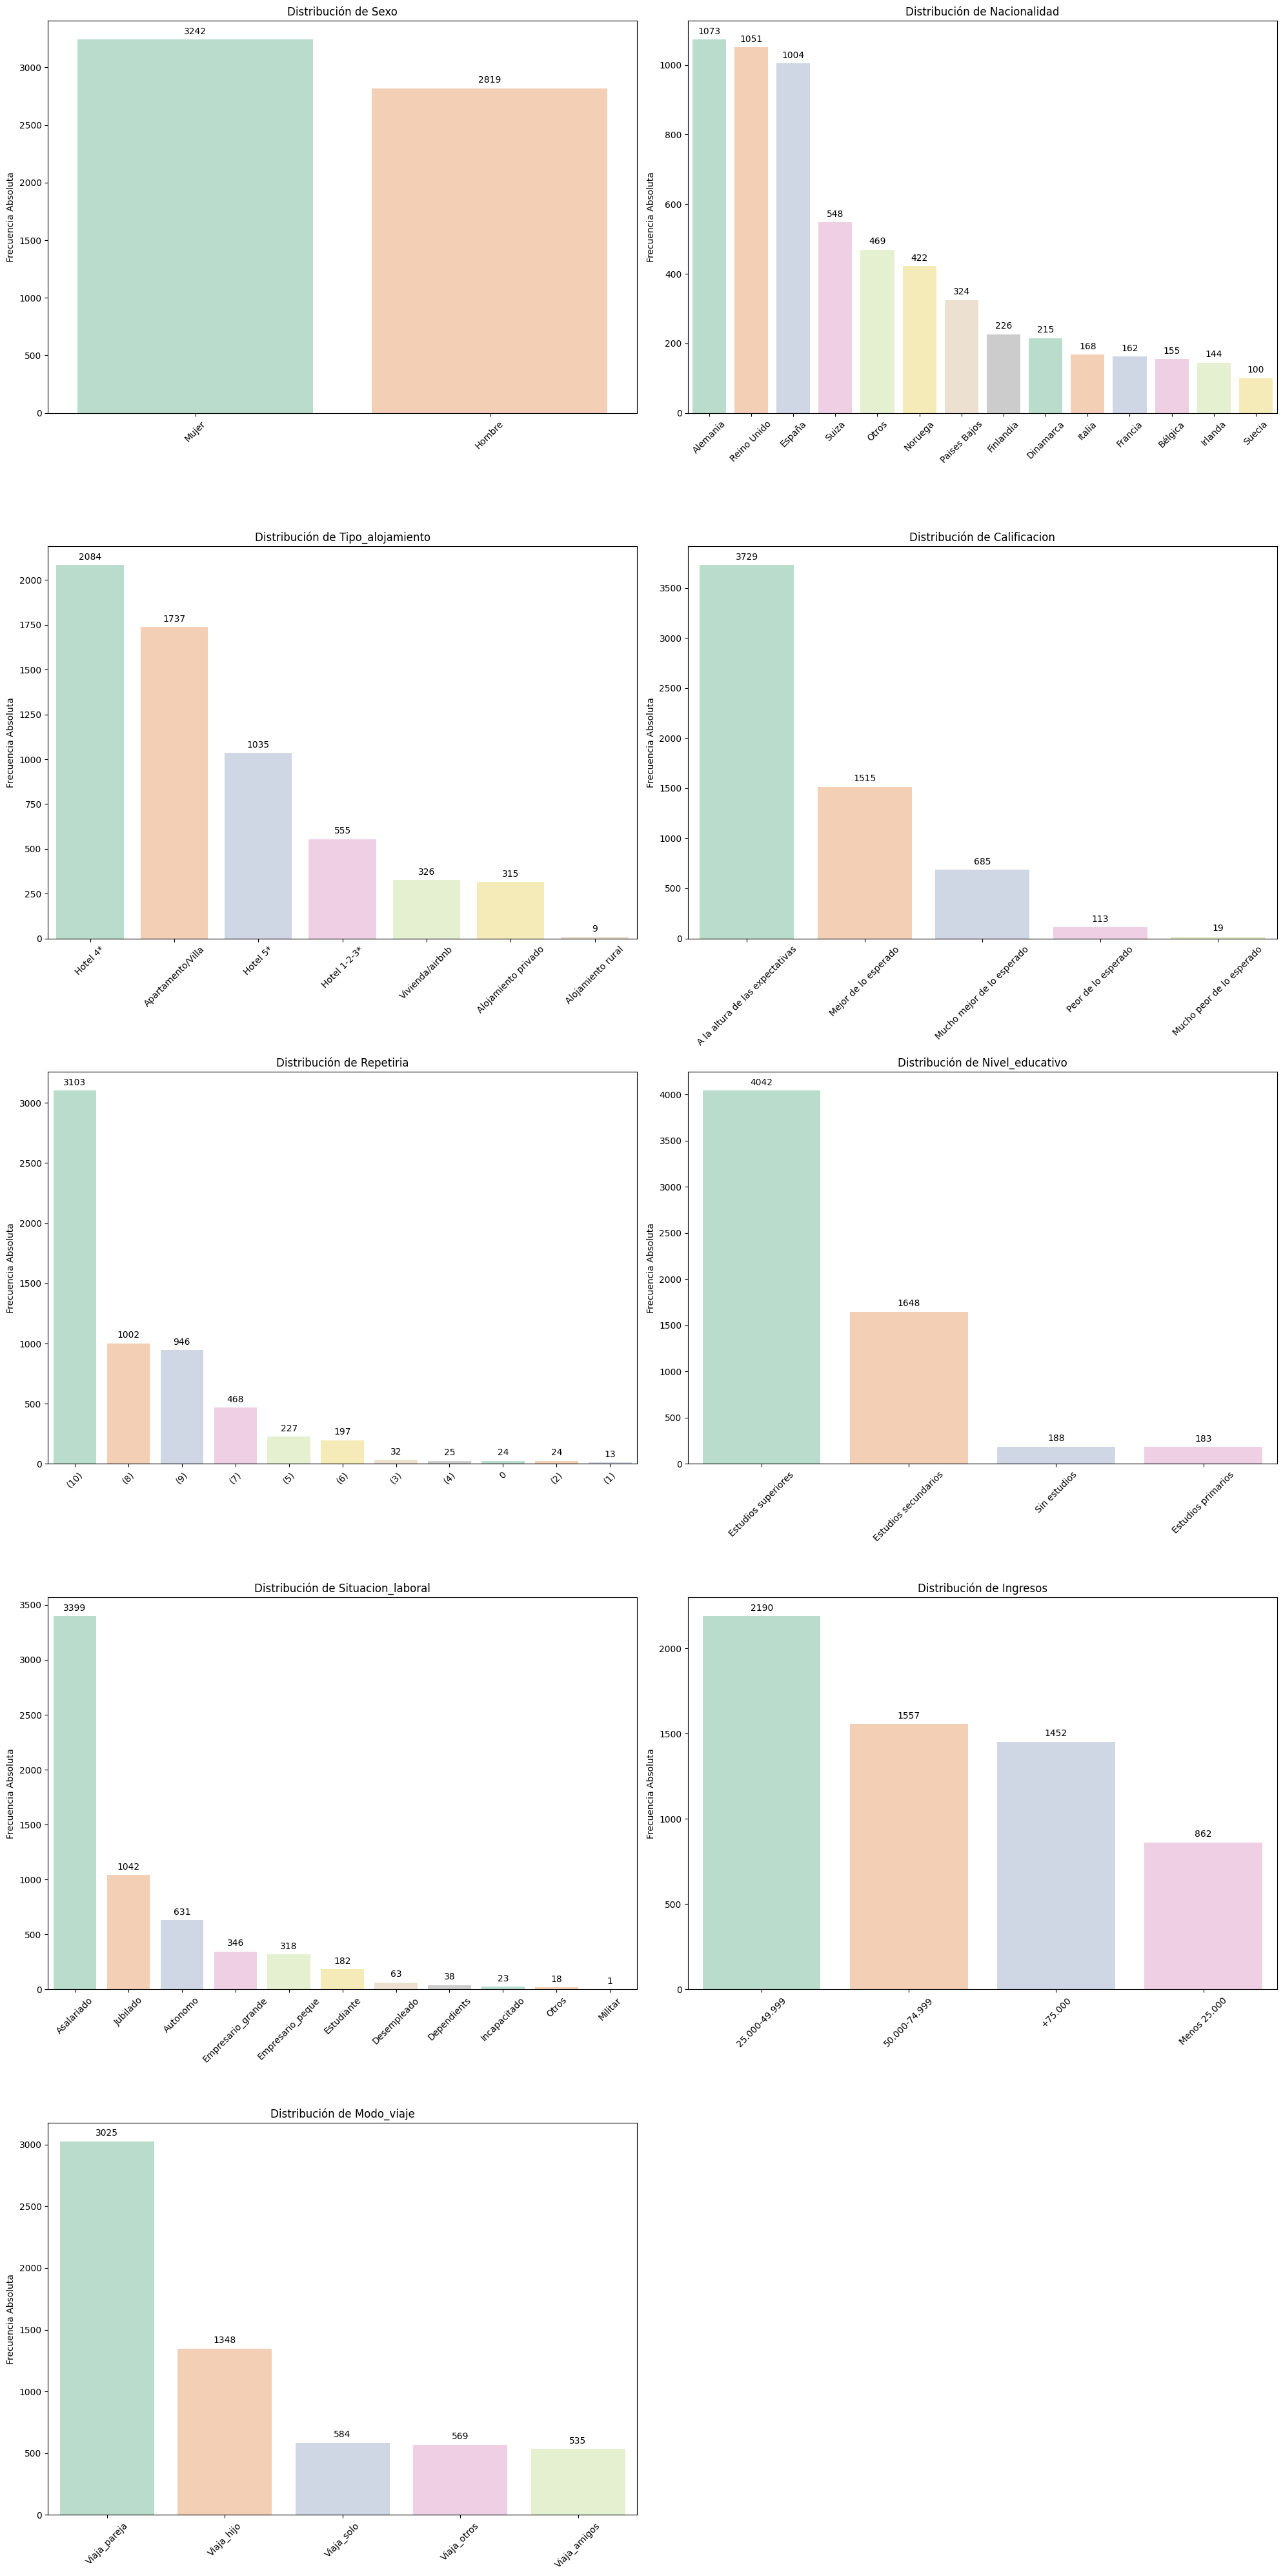

In [883]:
pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=False,mostrar_valores=True)

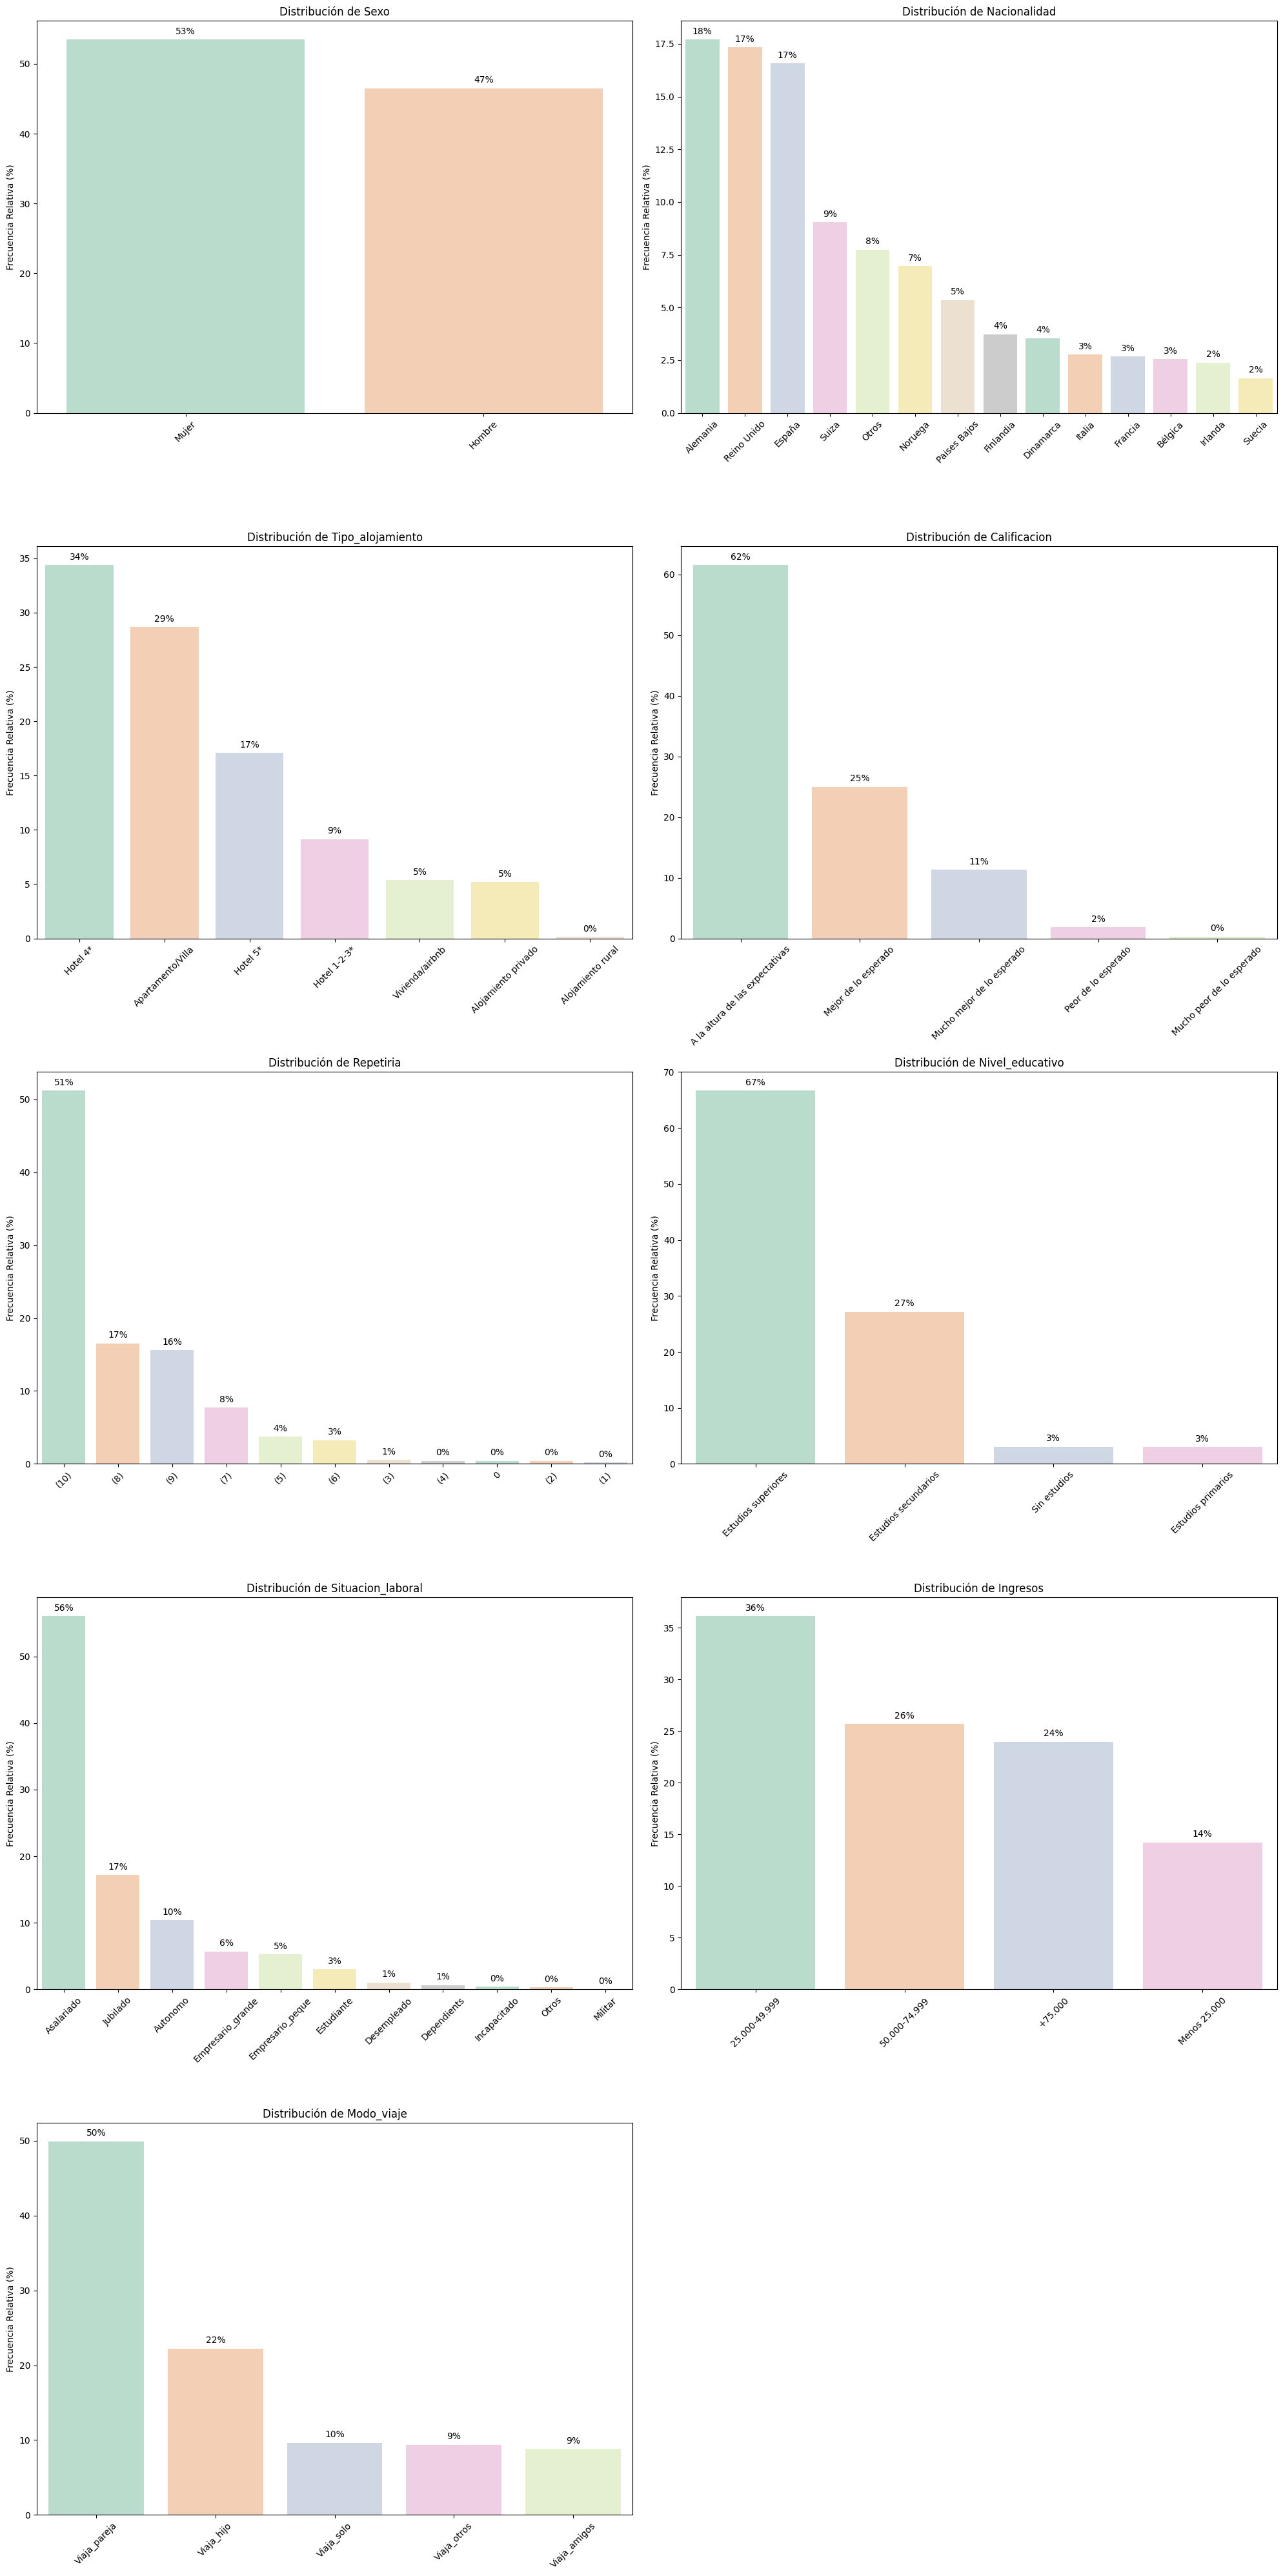

In [884]:
pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=True,mostrar_valores=True)

**2022**


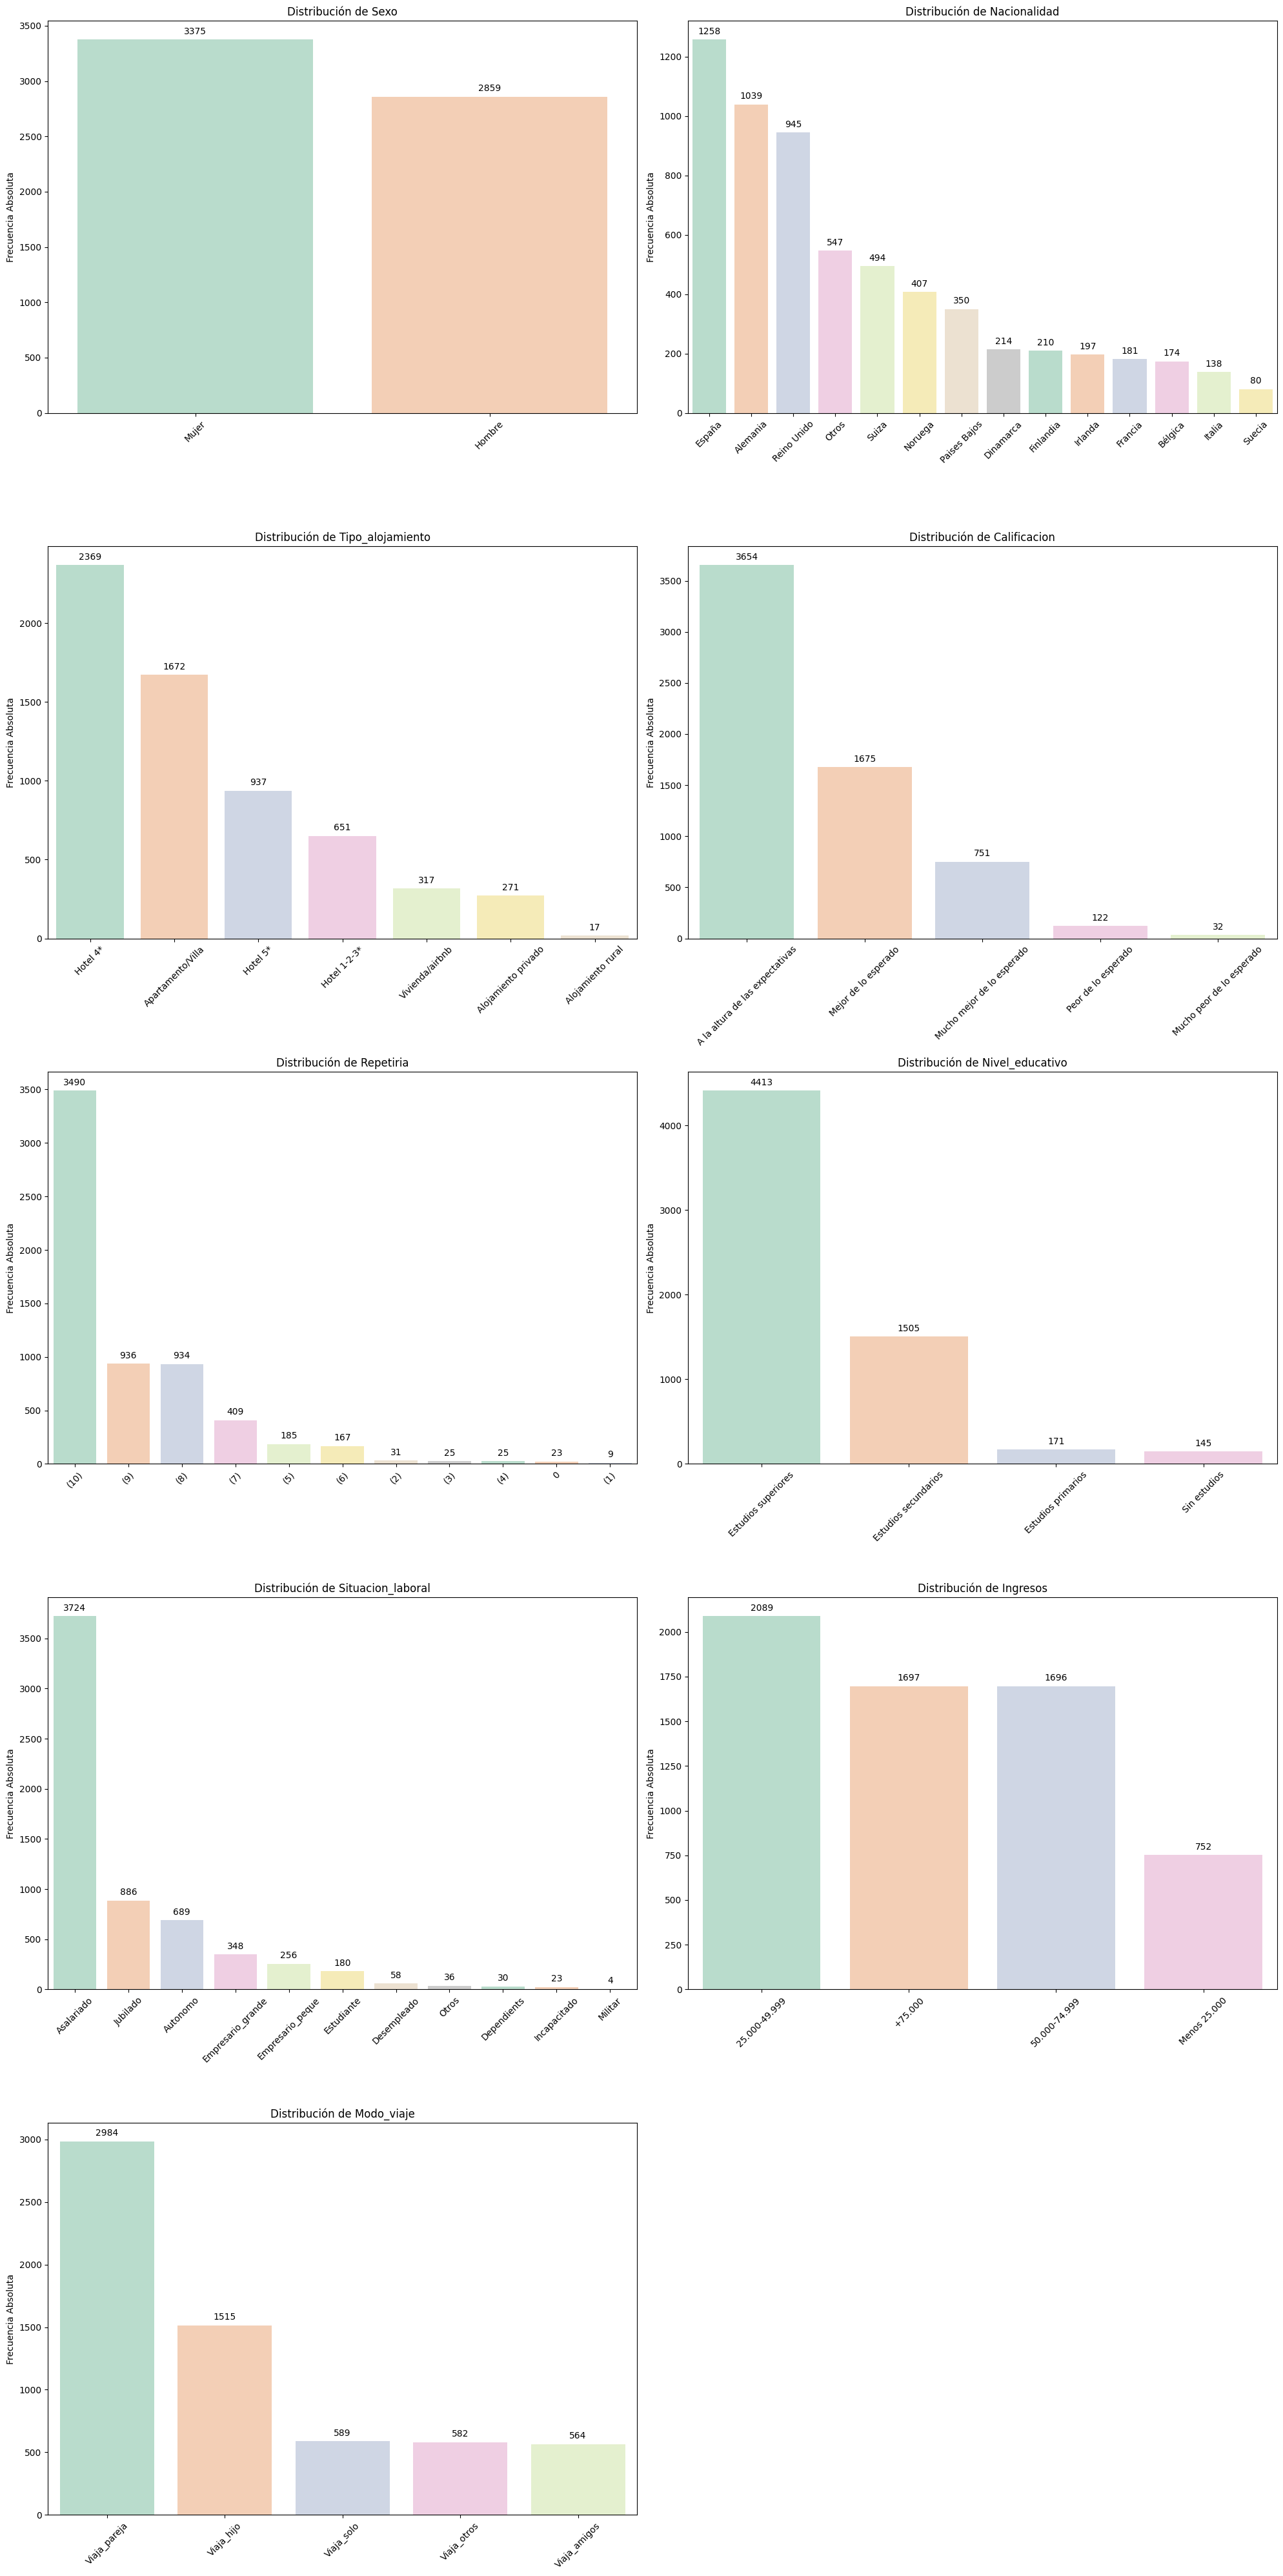

In [885]:
pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=False,mostrar_valores=True)

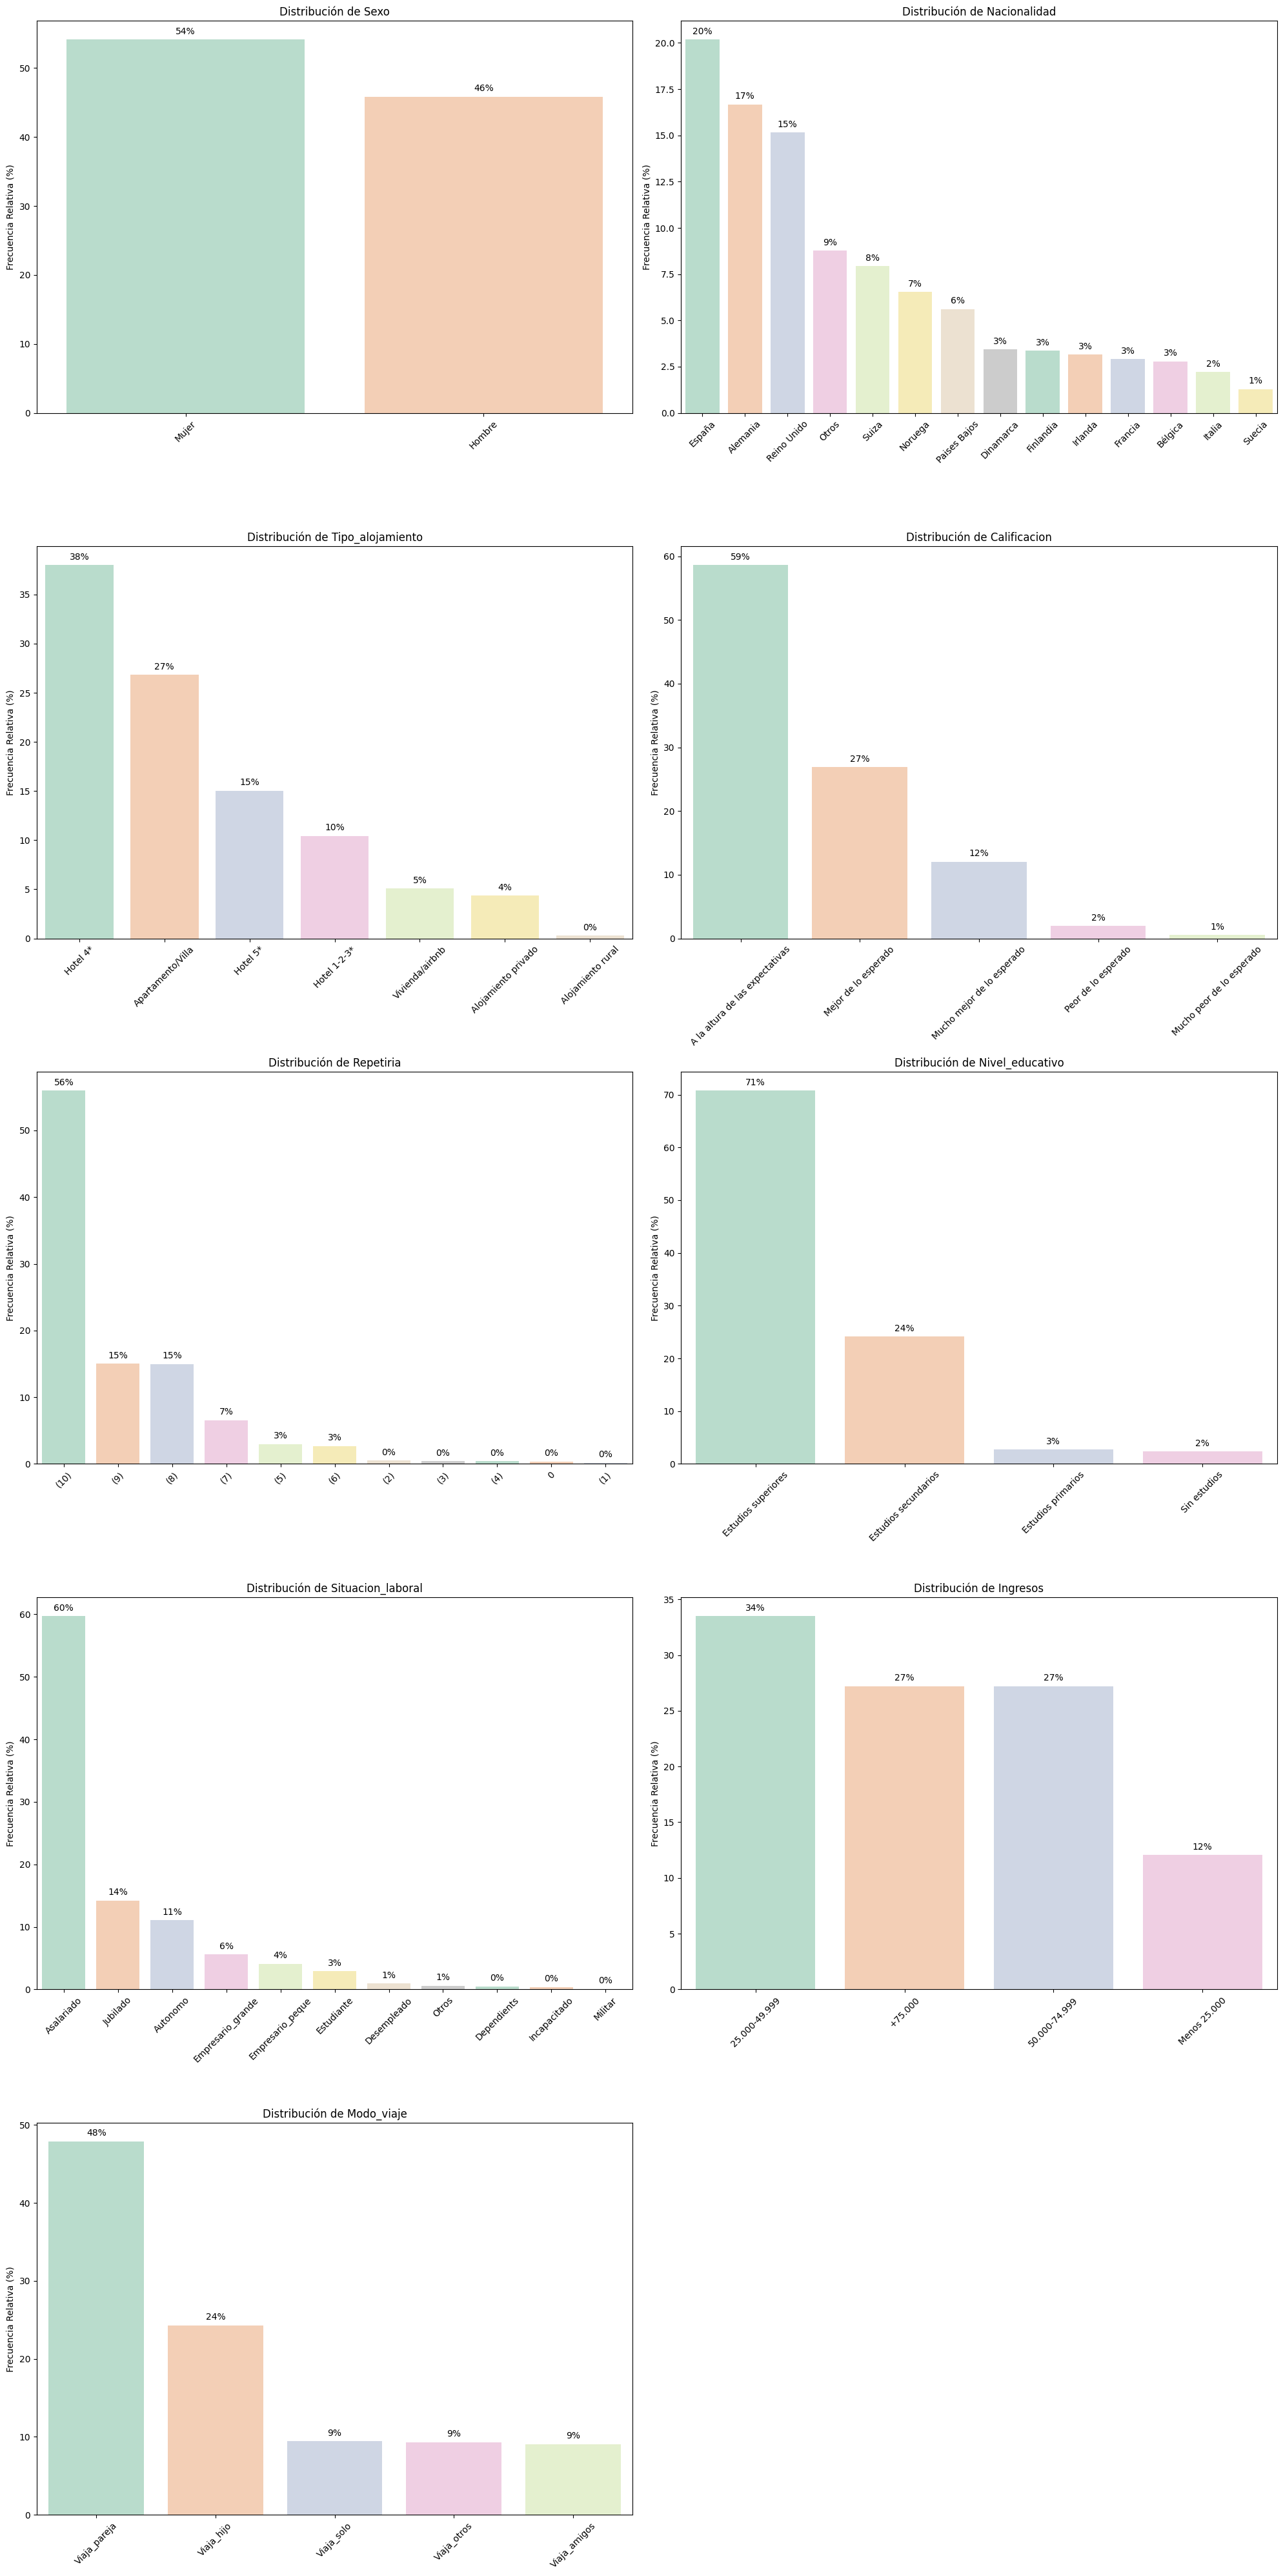

In [886]:
pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=True,mostrar_valores=True)

# **Resumen analisis univariante de las variables categóricas**

En resumen:

|Variables|Categoría|2019|2022|
|-|-|-|-|
|Sexo| Mujer| 53% |54% |
|Nacionalidad| Alemania - España |18% - 17%|20% -17% |
|Tipo de alojamiento| Hotel 4*| 34%| 37%|
|Calificación| 10| 62%| 59%|
|Repetiría| 10| 57%| 57%|
|Nivel educativo| Estudios superiores| 67%| 71%|
|Situación laboral| Asalariados| 55%| 59%|
|Ingresos| 25.000-49.999| 36%| 33%|
|Modo_viaje| Pareja| 50%| 49%|

# **Variables numéricas**

In [887]:
#Variables numéricas
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Gastos","Horas_fuera_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [888]:
#Principales estadísticos en 2019
df_2019.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Gastos,Horas_fuera_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Año
count,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.0
mean,47.733047,8.534730,366.042686,287.616715,360.302976,7.307870,5.922290,3.795248,2.533080,2019.0
std,14.623910,4.209998,298.708511,334.737851,279.043028,4.103599,5.067212,4.359067,1.154459,0.0
min,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2019.0
25%,37.000000,7.000000,10.000000,1.592000,115.000000,4.000000,2.000000,1.000000,2.000000,2019.0
50%,48.000000,7.000000,349.000000,60.000000,338.000000,7.000000,4.000000,2.000000,2.000000,2019.0
75%,58.000000,10.000000,600.000000,585.000000,567.000000,10.000000,8.000000,5.000000,3.000000,2019.0
max,89.000000,38.000000,999.000000,999.000000,999.000000,24.000000,25.000000,25.000000,13.000000,2019.0


Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 8 noches.

Costes y visitas: El coste medio de los vuelos es de 366€, mientras que el gasto en alojamiento asciende a 286€ y su gasto medio en la durante su estancia es de 357€. En promedio, los turistas han visitado las Islas Canarias unas 7 veces y, en particular, Gran Canaria en 3 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 7 horas al día fuera del alojamiento.

In [ ]:
#Principales estadísticos en 2022
df_2022.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Gastos,Horas_fuera_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Año
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.0
mean,48.074110,8.547482,351.790480,234.925786,341.690813,6.757940,6.077799,3.803016,2.497594,2022.0
std,14.262611,4.281684,310.306174,322.957657,294.716489,3.779451,5.211202,4.522119,1.158847,0.0
min,16.000000,1.000000,-45.000000,-62.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2022.0
25%,38.000000,7.000000,2.123750,1.571000,2.403000,4.000000,2.000000,1.000000,2.000000,2022.0
50%,49.000000,7.000000,320.000000,2.949000,313.000000,6.000000,4.000000,2.000000,2.000000,2022.0
75%,58.000000,10.000000,600.000000,493.000000,580.000000,10.000000,8.000000,4.000000,3.000000,2022.0
max,85.000000,39.000000,999.000000,999.000000,999.000000,15.000000,25.000000,25.000000,17.000000,2022.0


Edad y duración de la estancia: La edad media del turista es de 49 años, y su estancia promedio en la isla es de 9 noches.

Costes y visitas: El coste medio de los vuelos es de 352€, mientras que el gasto en alojamiento asciende a 235€ y su gasto durante las vacaciones es de 338€ de media. En promedio, los turistas han visitado las Islas Canarias unas 18 veces y, en particular, Gran Canaria en 15 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 4 horas al día fuera del alojamiento.

A diferencia del 2019, si hay una disminucion en las horas medias que los turistas pasan fuera del alojaminendo siendo 6h de media en el 2022, puede tener relación con las restricciones sanitarias y la inseguridad de la exposición en zonas de aglomeraciones.

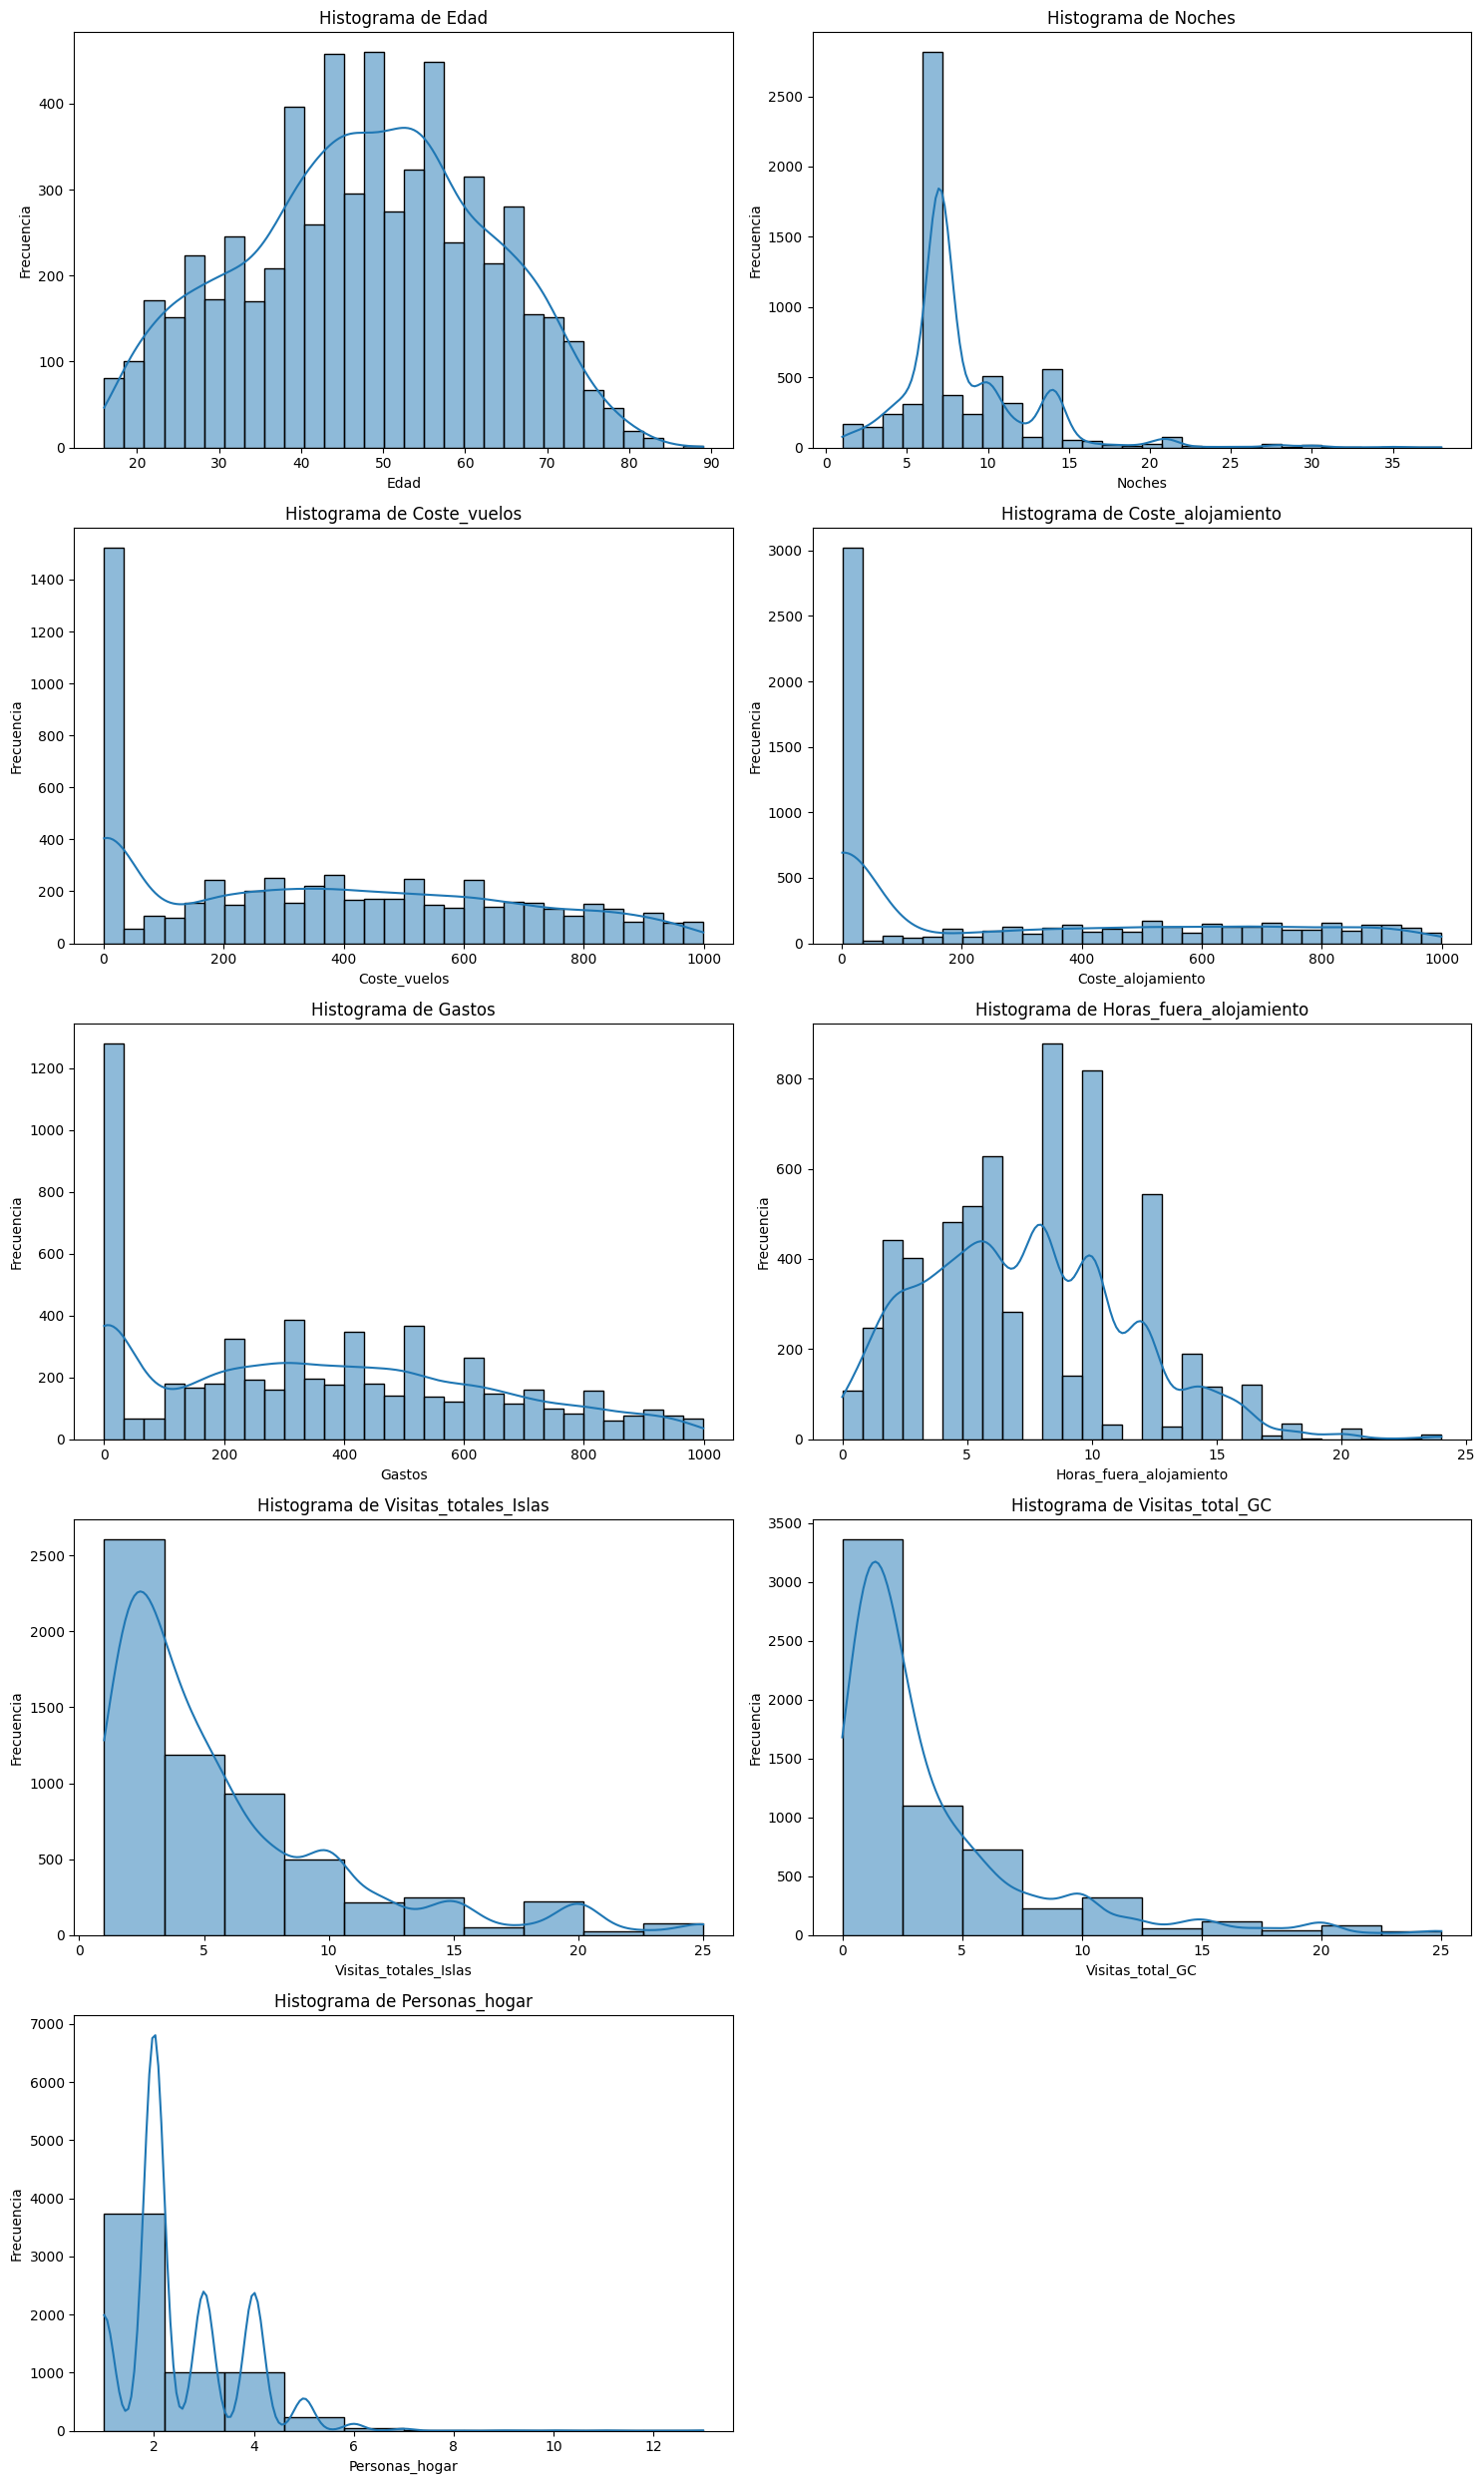

In [890]:
plot_numerical_histograms(df_2019, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

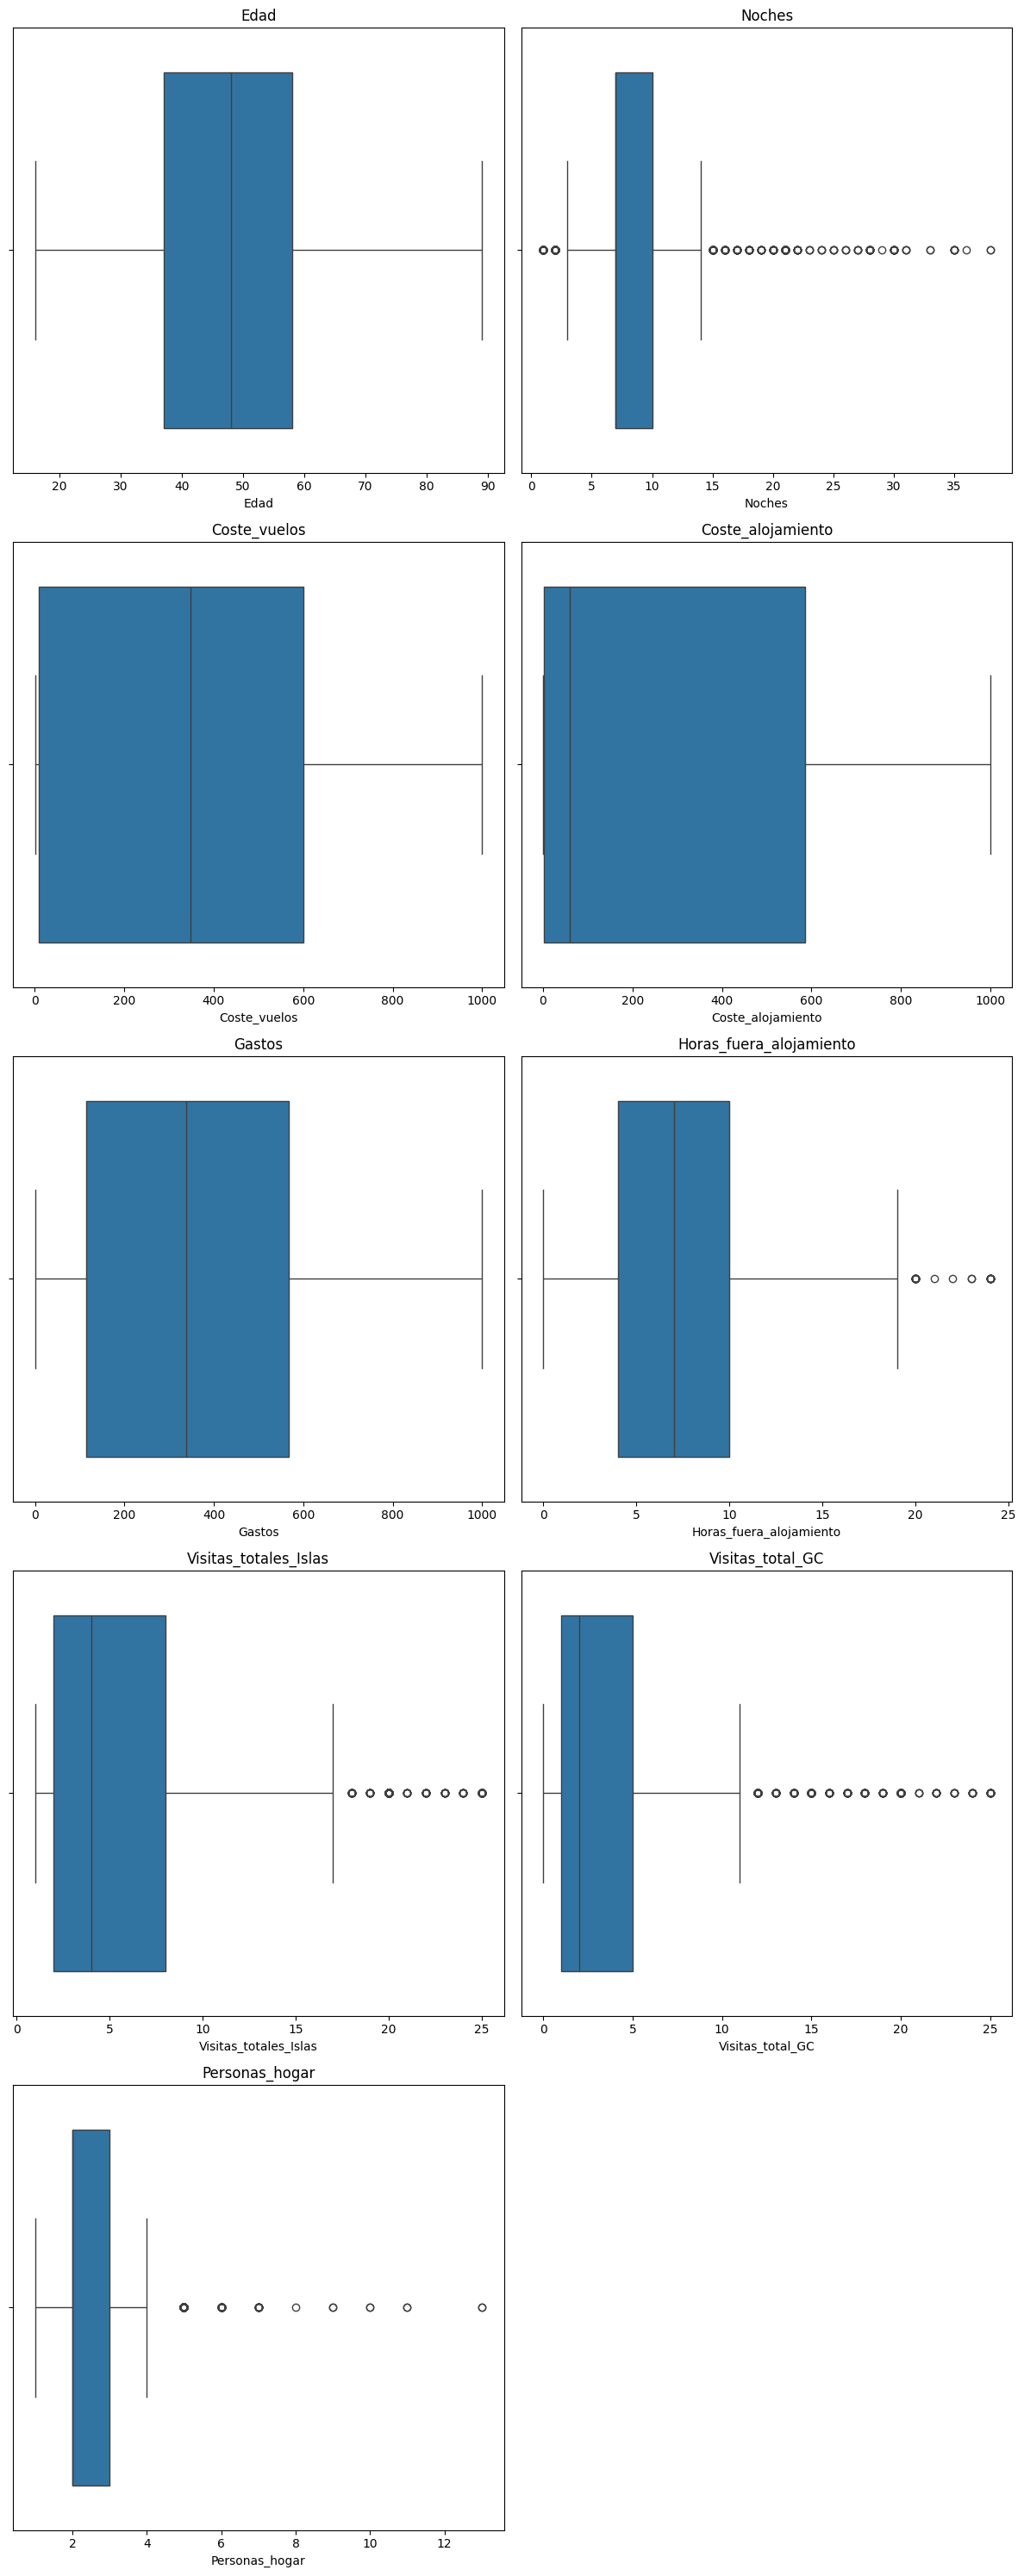

In [ ]:
plot_multiple_boxplots(df_2019, variables_numericas)

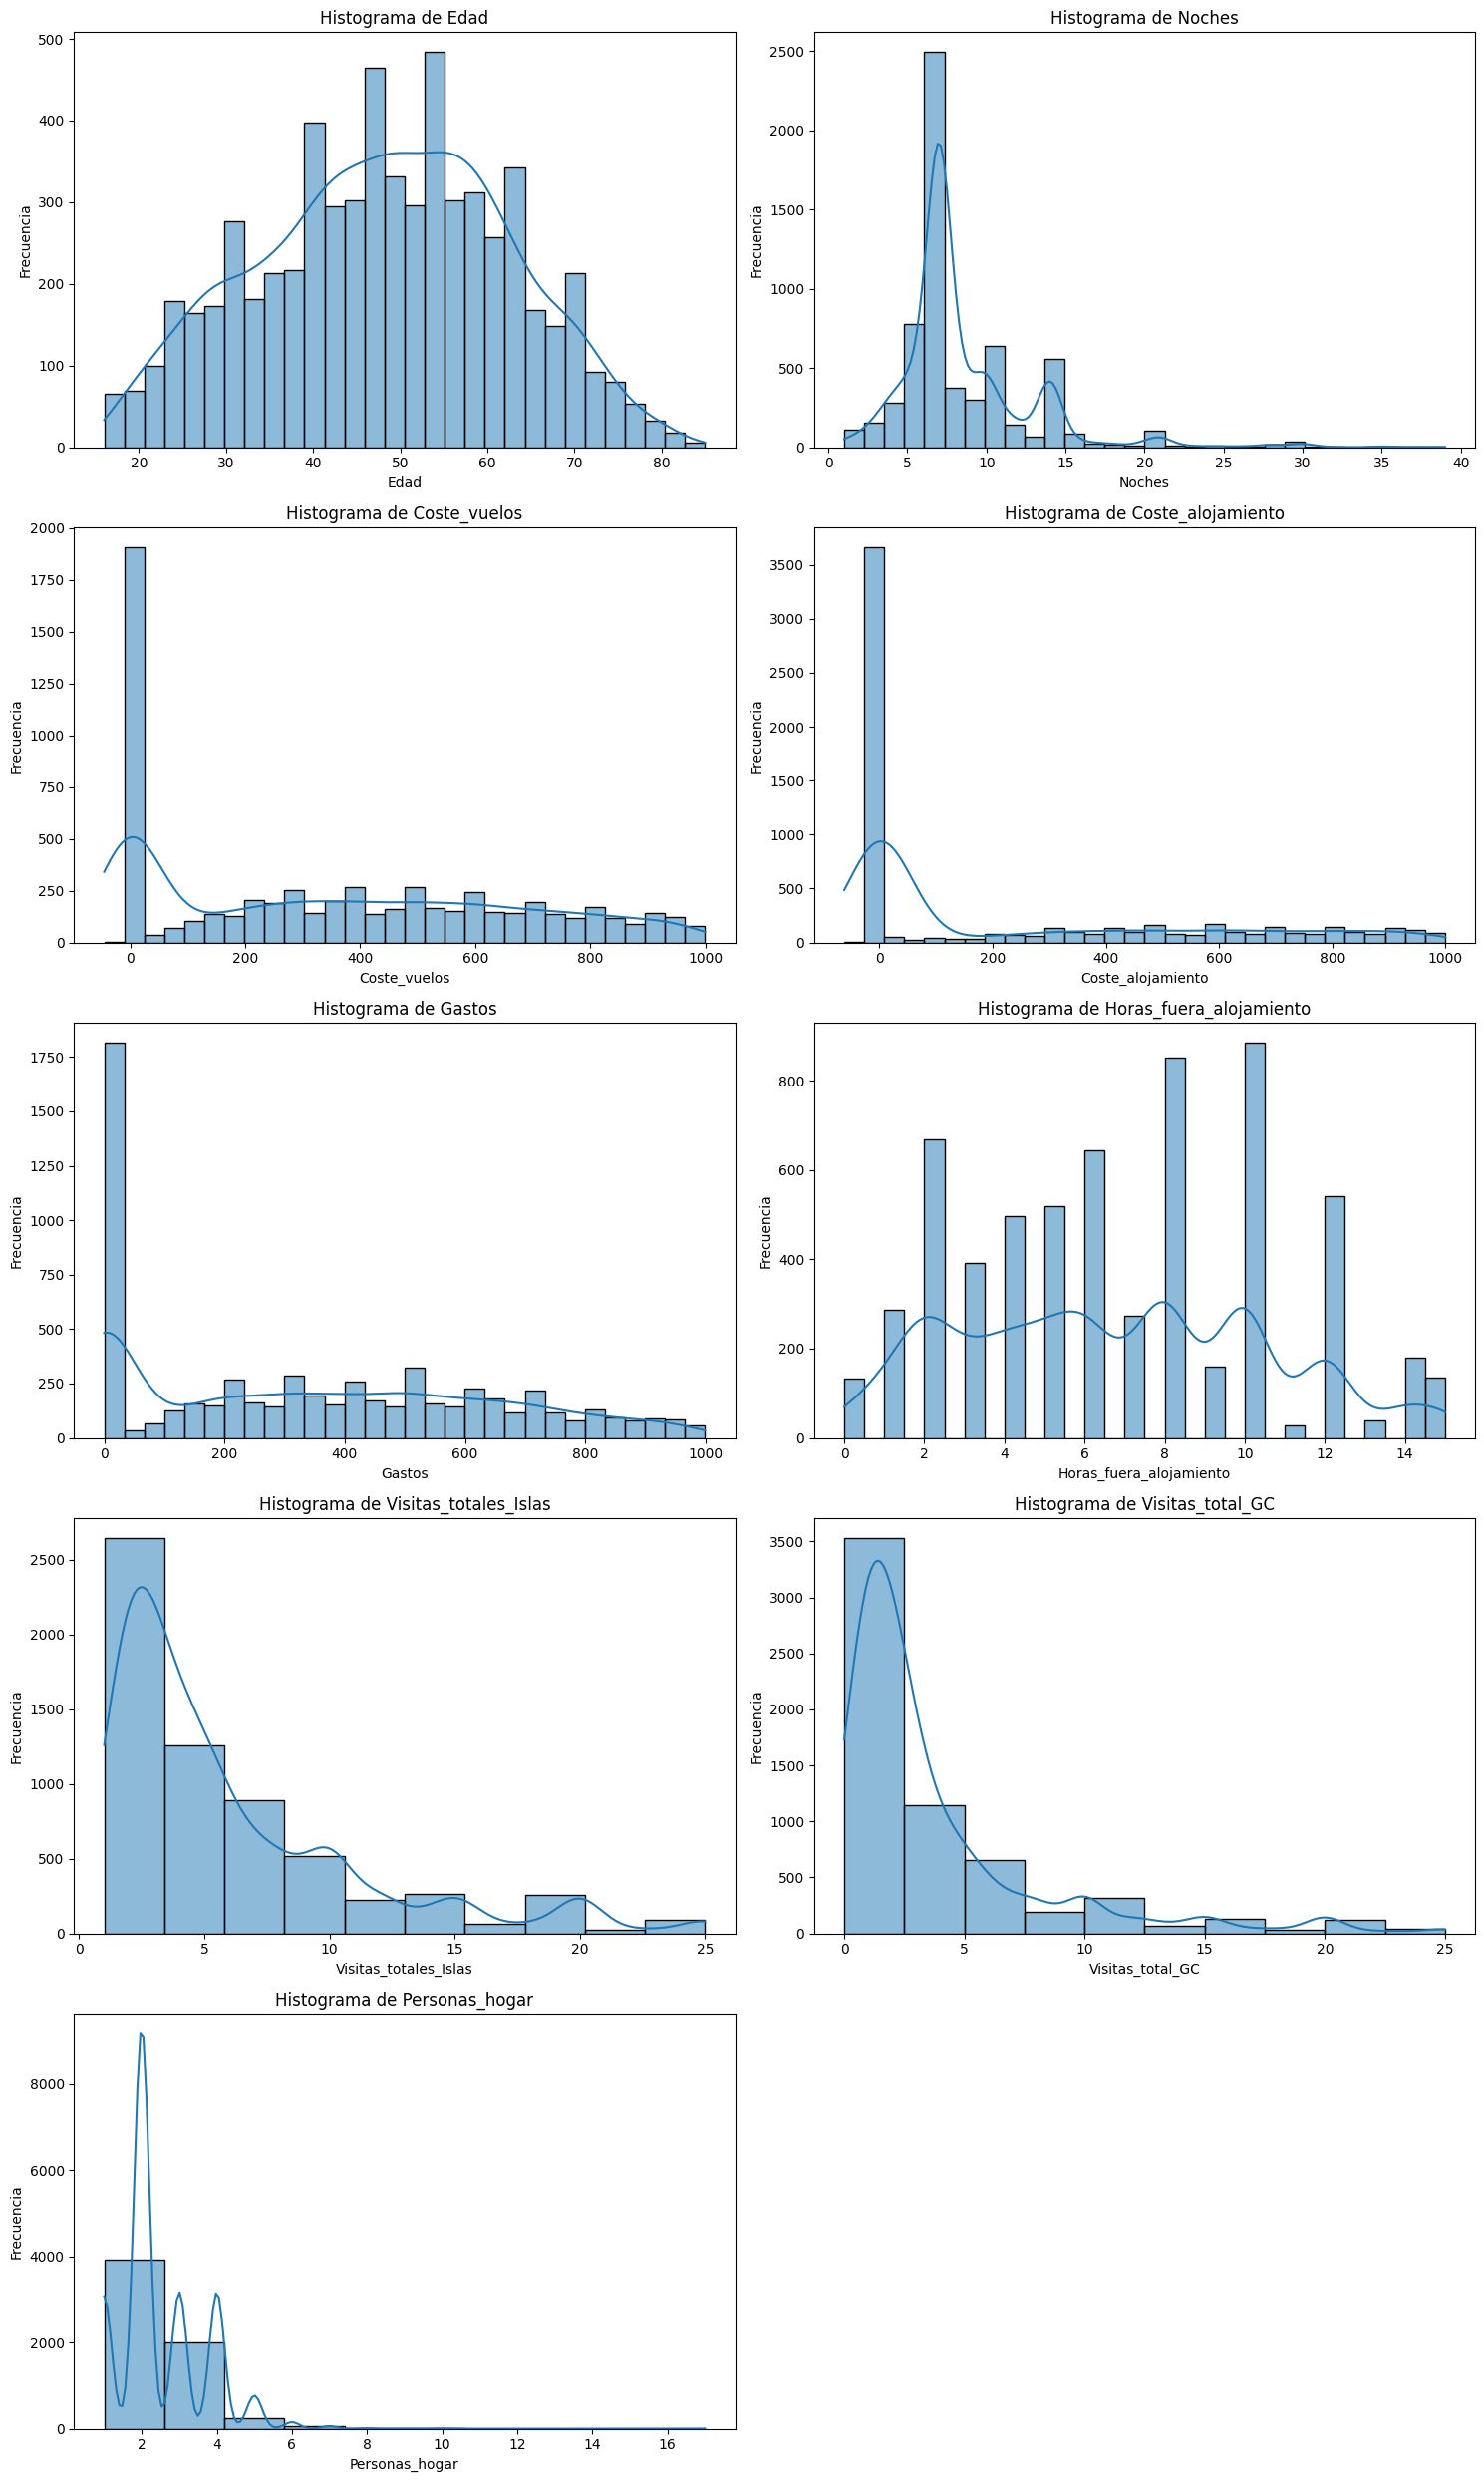

In [892]:
plot_numerical_histograms(df_2022, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

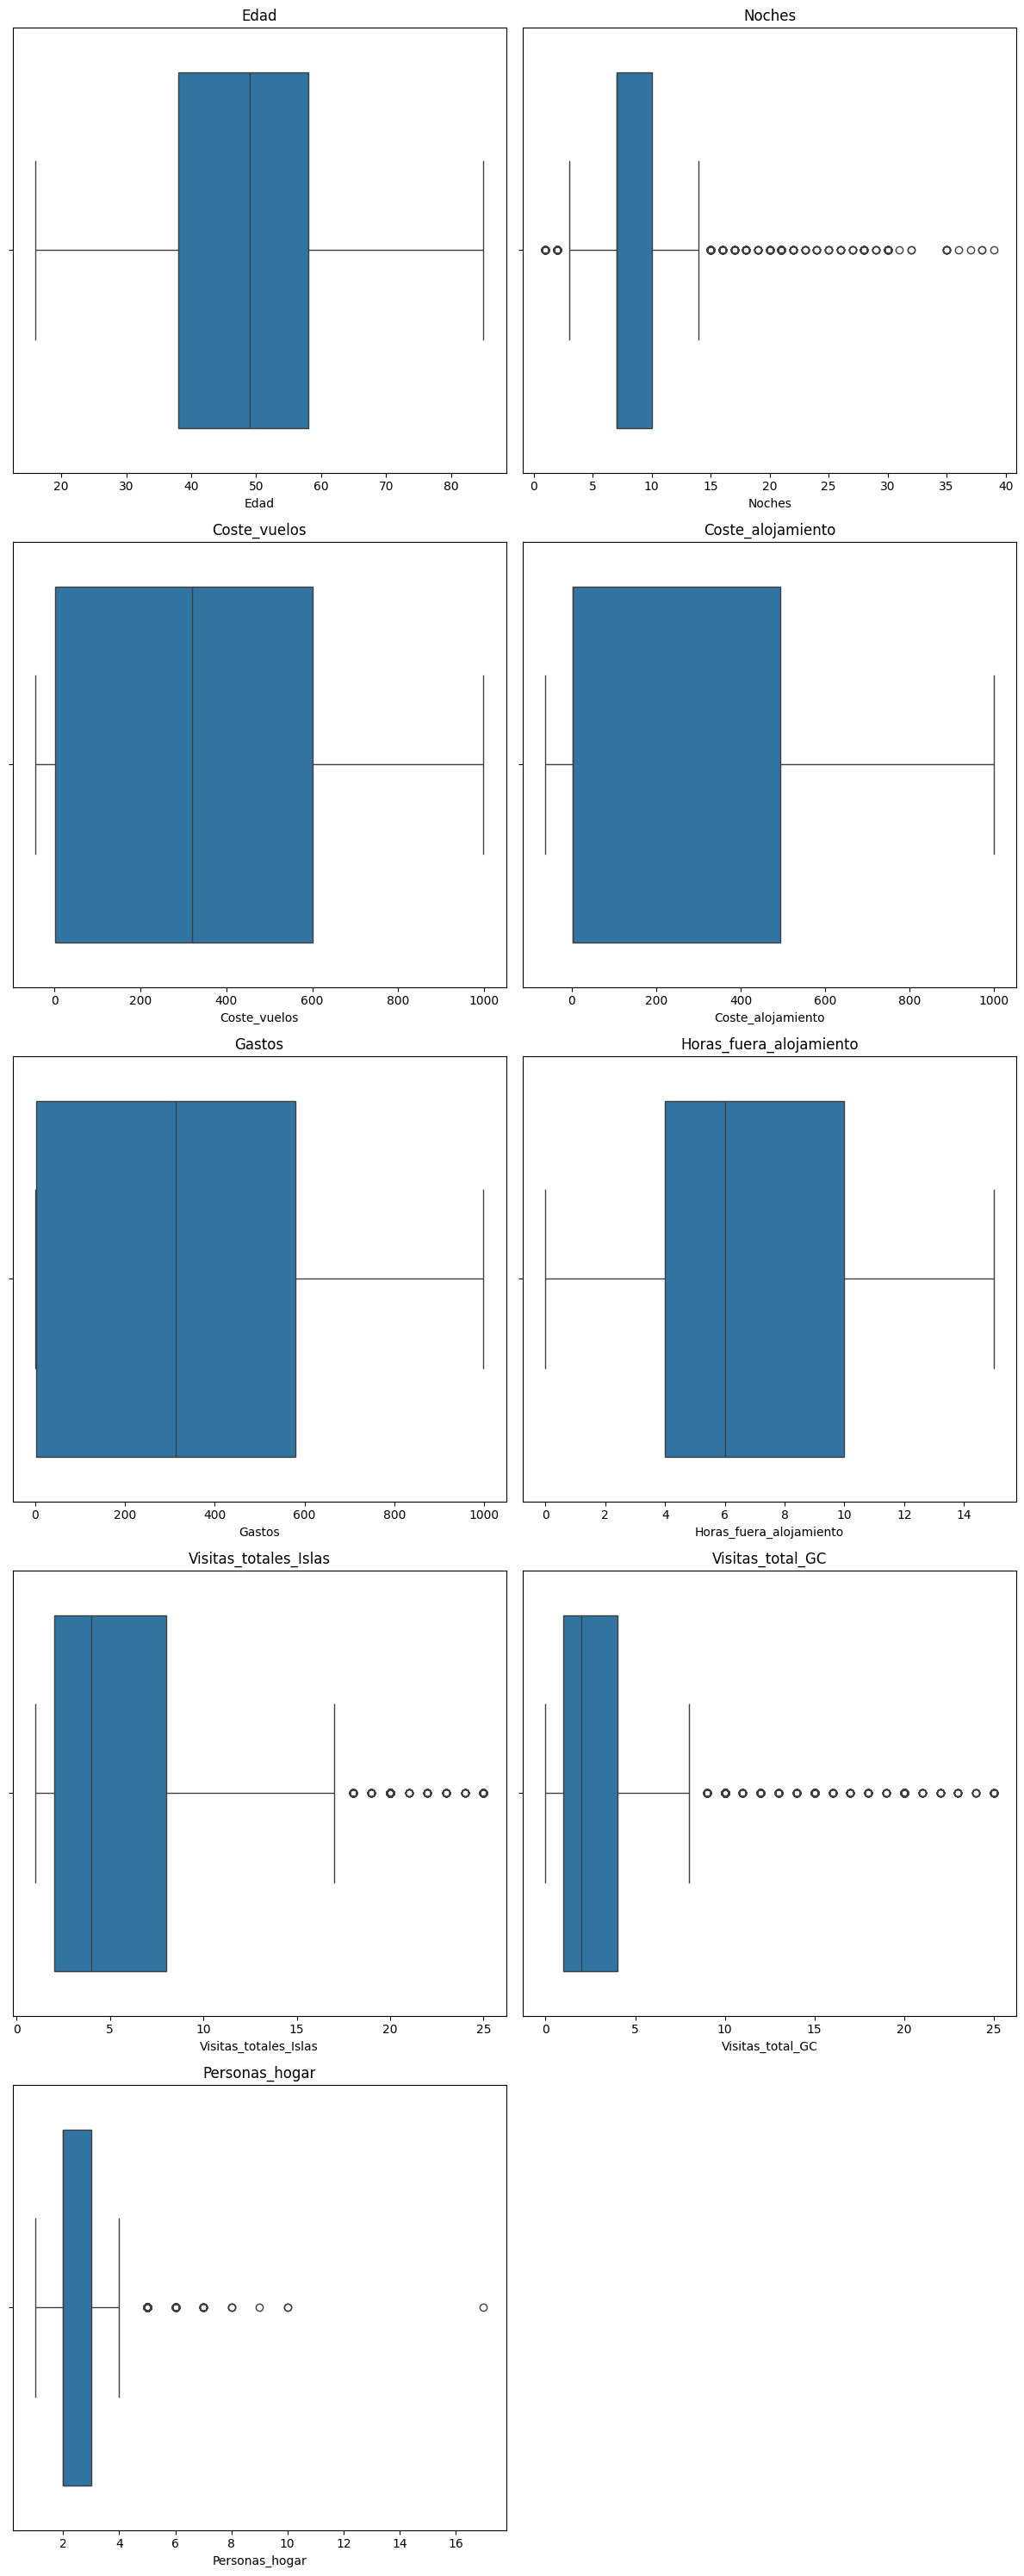

In [893]:
plot_multiple_boxplots(df_2022, variables_numericas)

En general, el comportamiento de las variables numéricas en ambos años son similares.

Edad: la población se distribuye como una normal con edades comprendidas entre 16-90 años, concentrándose la población,principalmente, en la edad media.

Noches: tiene una estructura Hypergeometric donde hay un salto importante en las 8 noche, donde se concentra bastante población.

El resto de variables sigue una estructura log-Normal donde se demuestra una segmentación donde la mayoria de los turistas coinciden y luego el resto del comportamiento es como el de una normal.

En general, no se observan variables muy dispersas pero si hay algunas con variables anómalos que lo comprobaremos con el CLV

In [894]:
def variabilidad(df_perfil_turistico):
    # Seleccionar solo las columnas numéricas
    df_numericas = df_perfil_turistico.select_dtypes(include=["number"])
    
    # Calcular el resumen estadístico y seleccionar las filas de std y mean
    df_var = df_numericas.describe().loc[["std", "mean"]].T
    
    # Calcular el Coeficiente de Variación (CV)
    df_var["CV"] = df_var["std"] / df_var["mean"]
    
    return df_var

In [895]:
variabilidad(df_perfil_turistico)

,std,mean,CV
Edad,14.442267,47.905978,0.301471
Noches,4.246329,8.541196,0.497159
Coste_vuelos,304.715071,358.816313,0.849223
Coste_alojamiento,329.857892,260.900550,1.264305
Gastos,287.236100,350.865951,0.818649
Horas_fuera_alojamiento,3.951992,7.029036,0.562238
Visitas_totales_Islas,5.141103,6.001139,0.856688
Visitas_total_GC,4.442309,3.799187,1.169279
Personas_hogar,1.156775,2.515087,0.459934
Año,1.499913,2020.521106,0.000742


Analizando las varianzas con respecto a la media, se confirma lo que hemos visto visualmente que hay variables que tienen un alta variabilidad como el coste del alojamiento y las visitas totales a Gran Canaria

In [896]:
#Rangos
df_perfil_turistico.describe().loc["max"] - df_perfil_turistico.describe().loc["min"]

Edad                         73.0
Noches                       38.0
Coste_vuelos               1044.0
Coste_alojamiento          1061.0
Gastos                      999.0
Horas_fuera_alojamiento      24.0
Visitas_totales_Islas        24.0
Visitas_total_GC             25.0
Personas_hogar               16.0
Año                           3.0
dtype: float64

# ***Análisis bivariantes***

In [ ]:
for cat_col in variables_categoricas:
    for num_col in variables_numericas:
        plot_categorical_numerical_histograms(df_2019, cat_col, num_col)

Es hora de ver si existe alguna relación entre las columnas o variables de nuestro dataset, relación que puede no existir (variables independientes), existir e indicar que las variables cambian más o menos al mismo tiempo (pero no necesariamente en el mismo sentido), situación que llamaremos correlación, y finalmente que haya una relación de cuasalidad (cuando una cambia conlleva que otra cambie como consecuencia de esto)

Para este estudio nos haremos preguntas concretas 

* Nacionalidad vs noches

Según la nacionalidad de procedencia, ¿influye el número de noches que pasa en la Isla?

¿Existen diferencias en el promedio de noches pasadas por los turistas de diferentes nacionalidades?

¿La duración de la estancia varía significativamente entre las nacionalidades?

¿Existen diferencias estadísticas significativas en la duración de la estancia entre los turistas de distintas nacionalidades?

In [901]:
df_promedio_noches = df_2019.groupby('Nacionalidad')['Noches'].mean().reset_index()
df_promedio_noches = df_promedio_noches.sort_values('Noches', ascending=False)
print(df_promedio_noches)
df_promedio_noches = df_2022.groupby('Nacionalidad')['Noches'].mean().reset_index()
df_promedio_noches = df_promedio_noches.sort_values('Noches', ascending=False)
print(df_promedio_noches)

    Nacionalidad     Noches
8        Noruega  10.357820
0       Alemania   9.828518
10  Paises Bajos   9.521605
13         Suiza   8.990876
5        Francia   8.969136
12        Suecia   8.940000
7         Italia   8.684524
9          Otros   8.626866
4      Finlandia   8.482301
1        Bélgica   8.419355
2      Dinamarca   8.390698
11   Reino Unido   8.106565
6        Irlanda   7.597222
3         España   6.282869
    Nacionalidad     Noches
8        Noruega  10.845209
12        Suecia  10.200000
0       Alemania   9.813282
4      Finlandia   9.447619
13         Suiza   9.012146
10  Paises Bajos   8.851429
9          Otros   8.822669
5        Francia   8.469613
2      Dinamarca   8.317757
6        Irlanda   8.294416
1        Bélgica   8.252874
7         Italia   8.181159
11   Reino Unido   8.116402
3         España   6.611288
